In [ ]:
#https://towardsdatascience.com/generate-any-sport-highlights-using-python-3695c98baead

In [2]:
import moviepy.editor as mp
clip = mp.VideoFileClip("FIFA18_Video.mp4")#.subclip(1, 1380)
clip.audio.write_audiofile("FIFA18_Audio.wav")

MoviePy - Writing audio in FIFA18_Audio.wav


chunk:  24%|██████████████▎                                            | 5954/24616 [00:07<00:28, 664.10it/s, now=None]


chunk:  48%|███████████████████████████▉                              | 11834/24616 [00:14<00:15, 827.77it/s, now=None]


chunk:  73%|██████████████████████████████████████████▍               | 18012/24616 [00:21<00:07, 843.12it/s, now=None]


chunk:  94%|██████████████████████████████████████████████████████▋   | 23235/24616 [00:29<00:02, 610.38it/s, now=None]


chunk: 100%|█████████████████████████████████████████████████████████▉| 24606/24616 [00:31<00:00, 782.07it/s, now=None]


MoviePy - Done.


chunk:  81%|██████████████████████████████████████████████           | 24595/30407 [07:22<00:05, 1037.37it/s, now=None]

In [3]:
import librosa
import IPython.display as ipd
filename = "FIFA18_Audio.wav"
# loading the file with a sampling rate
x, sr = librosa.load(filename, sr=16000)
# To get duration of the audio clip in minutes
int(librosa.get_duration(x, sr) / 60)
# Dividing into chunks of 5 seconds 
max_slice = 10
window_length = max_slice * sr
# Playing the audio chunk
a = x[21 * window_length:22 * window_length]
ipd.Audio(a, rate=sr)

In [4]:
# Calculate the energy
energy = sum(abs(a ** 2))
print(energy)
import numpy as np
# Calculate the energy for each chunk
energy = np.array([sum(abs(x[i:i + window_length] ** 2)) for i in range(0, len(x), window_length)])

388.43476856559016


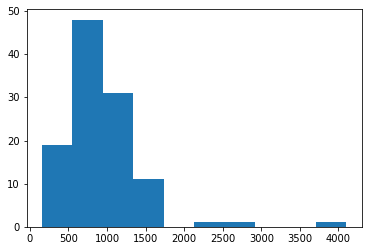

In [5]:
import matplotlib.pyplot as plt
plt.hist(energy)
plt.show()


In [9]:
import pandas as pd
df = pd.DataFrame(columns=['energy', 'start', 'end'])
thresh = 180
row_index = 0
for i in range(len(energy)):
    value = energy[i]
    if value >= thresh:
        i = np.where(energy == value)[0]
        df.loc[row_index, 'energy'] = value
        df.loc[row_index, 'start'] = i[0] * 10
        df.loc[row_index, 'end'] = (i[0] + 1) * 10
        row_index = row_index + 1

In [10]:
temp = []
i = 0
j = 0
n = len(df) - 2
m = len(df) - 1
while (i <= n):
    j = i + 1
    while (j <= m):
        if (df['end'][i] == df['start'][j]):
            df.loc[i, 'end'] = df.loc[j, 'end']
            temp.append(j)
            j = j + 1
        else:
            i = j
            break
df.drop(temp, axis=0, inplace=True)
print(df)

     energy start   end
0   753.183     0   780
78  876.084   790  1120


In [11]:
#function additionally added to code for NameError: name 'ffmpeg_extract_subclip' is not defined
from moviepy.tools import subprocess_call
from moviepy.config import get_setting

def ffmpeg_extract_subclip(filename, t1, t2, targetname=None):
    """ Makes a new video file playing video file ``filename`` between
    the times ``t1`` and ``t2``. """
    name, ext = os.path.splitext(filename)
    if not targetname:
        T1, T2 = [int(1000*t) for t in [t1, t2]]
        targetname = "%sSUB%d_%d.%s" % (name, T1, T2, ext)

    cmd = [get_setting("FFMPEG_BINARY"),"-y",
           "-ss", "%0.2f"%t1,
           "-i", filename,
           "-t", "%0.2f"%(t2-t1),
           "-vcodec", "copy", "-acodec", "copy", targetname]

    subprocess_call(cmd)

In [13]:
import os
start = np.array(df['start'])
end = np.array(df['end'])
for i in range(len(df)):
    if i != 0:
        start_lim = start[i] - 10
    else:
        start_lim = start[i]
    end_lim = end[i]
    filename = "highlight" + str(i + 1) + ".mp4"
    ffmpeg_extract_subclip("FIFA18_Video.mp4", start_lim, end_lim, targetname=filename)

Moviepy - Running:
>>> "+ " ".join(cmd)


Moviepy - Command successful


Moviepy - Running:
>>> "+ " ".join(cmd)


Moviepy - Command successful


chunk:  81%|██████████████████████████████████████████████           | 24595/30407 [13:53<00:05, 1037.37it/s, now=None]

In [16]:
from moviepy.editor import VideoFileClip, concatenate_videoclips
clip1 = VideoFileClip("highlight1.mp4")
clip2 = VideoFileClip("highlight2.mp4")
#clip3 = VideoFileClip("highlight3.mp4")
#clip4 = VideoFileClip("highlight5.mp4")
#clip5 = VideoFileClip("highlight6.mp4")
#clip6 = VideoFileClip("highlight7.mp4")
#clip7 = VideoFileClip("highlight8.mp4")
#clip8 = VideoFileClip("highlight9.mp4")
#clip9 = VideoFileClip("highlight10.mp4")
#clip10 = VideoFileClip("highlight11.mp4")
#clip11= VideoFileClip("highlight12.mp4")
#clip12 = VideoFileClip("highlight13.mp4")
#clip13= VideoFileClip("highlight14.mp4")#14
#clip14= VideoFileClip("highlight4.mp4")#4
#final_clip = concatenate_videoclips([clip1,clip2,clip3,clip4,clip5,clip6,clip7,clip8,clip9,clip9,clip10,clip11,clip12,clip14])#clip13,clip14])
#final_clip.write_videofile("Final_Highlights.mp4")

OSError: [WinError 6] The handle is invalid